# 캘리포니아 집값 예측

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd

## 데이터 읽어오기

In [132]:
df = pd.read_csv('./datasets/housing.csv')
df.shape

(20640, 10)

In [133]:
df = df.iloc[:1000, :]

In [134]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
900,-121.97,37.53,35.0,2277.0,420.0,1353.0,413.0,4.75,197000.0,<1H OCEAN


In [135]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        6
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [136]:
df['total_bedrooms'].mean()

485.16901408450707

In [137]:
# 평균값으로 채워서, 덮어쓴다
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isna().sum().sum()

0

In [138]:
data = pd.get_dummies(df)
y = data['median_house_value']
x = data.drop(columns='median_house_value')
x = x.iloc[:, 2:]
x.shape, y.shape

((1000, 9), (1000,))

In [139]:
x.sample()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
801,25.0,4524.0,860.0,2426.0,862.0,4.7083,0,0,1


In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [141]:
model.coef_, model.intercept_

(array([ 8.79492032e+02,  4.95472766e+00, -2.25808831e+01, -4.14896659e+01,
         1.36407417e+02,  3.76627370e+04,  1.13838660e+03,  1.07588859e+04,
        -1.18972725e+04]), 28754.231771889958)

In [142]:
model.score(x,y)

0.6323701578901336

In [165]:
x = np.array(x)
y = np.array(y)
x = (x-np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
y = (y-np.min(y, axis=0)) / (np.max(y, axis=0) - np.min(y, axis=0))
#x /= np.max(x, axis=0)
#y /= np.max(y, axis=0)
x.shape, y.shape

((1000, 9), (1000,))

In [166]:
# 기능(모델) 구현
w = tf.Variable(tf.random_normal(shape=[9])) # 초기값 1.0 으로 두고, 모델이 스스로 조절해나가는 값
b = tf.Variable(0.0)
# hypothesis = tf.reduce_sum(w * x, axis=1) + b #n keepdims는 차원을 줄이지 말아라 명령어
hypothesis = tf.reduce_sum(w * x, axis=1, keepdims=True) + b #n keepdims는 차원을 줄이지 말아라 명령어
print(hypothesis)
# MSE 오차
cost = tf.reduce_mean((y - hypothesis) **2)
learning_rate = 0.001 # 학습률
# 경사하강법으로 오차를 최소화해라
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Tensor("add_8:0", shape=(1000, 1), dtype=float32)


In [167]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화를 통해 메모리 할당해줌(malloc과 동일)
sess.run(cost)

0.9033204

In [168]:
for i in range(5000): # 에포크 : 변수를 몇번 업데이트 하느냐
    sess.run(train)
    if i%1000==0:
        print(i, sess.run(cost))

0 0.89620024
1000 0.16473311
2000 0.15026398
3000 0.13927262
4000 0.13052563


In [169]:
sess.run(hypothesis)

array([[ 7.68179715e-01],
       [ 1.00233531e+00],
       [ 7.83300936e-01],
       [ 6.07134759e-01],
       [ 3.90763938e-01],
       [ 3.87495697e-01],
       [ 4.83444273e-01],
       [ 4.71532762e-01],
       [ 2.44856179e-01],
       [ 5.93853414e-01],
       [ 3.91385853e-01],
       [ 5.48859537e-01],
       [ 4.07341897e-01],
       [ 2.06157506e-01],
       [ 3.19941461e-01],
       [ 1.82824969e-01],
       [ 3.01355302e-01],
       [ 1.98248804e-01],
       [ 2.35114574e-01],
       [ 2.60220408e-01],
       [-8.07906389e-02],
       [ 9.22562480e-02],
       [ 2.47994959e-01],
       [ 2.37580717e-01],
       [ 3.29778373e-01],
       [ 3.41633558e-02],
       [ 1.90260112e-01],
       [ 2.45238423e-01],
       [ 2.24484682e-01],
       [ 8.04519057e-02],
       [ 2.02665150e-01],
       [ 2.85948575e-01],
       [ 1.86385334e-01],
       [ 1.00576758e-01],
       [ 4.00936663e-01],
       [ 7.33690262e-02],
       [ 1.03076279e-01],
       [ 1.67002022e-01],
       [ 3.7

In [170]:
sess.run([w, b])

[array([ 0.5355349 , -0.5186793 ,  1.0925099 ,  1.6405479 ,  0.03322037,
         1.6199311 , -1.7759007 , -1.4042047 , -1.2481639 ], dtype=float32),
 0.5620077]

In [171]:
np.round(sess.run(hypothesis))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 1.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
      

In [172]:
import matplotlib.pyplot as plt

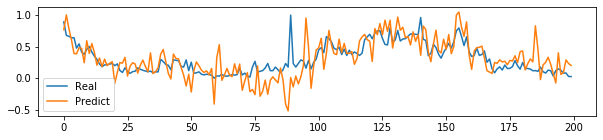

In [173]:
p = sess.run(hypothesis)
plt.figure(figsize=(10, 2))
plt.plot(y[:200], label='Real')
plt.plot(p[:200], label='Predict')
plt.legend()